# IBM Price Prediction
Predicts IBM Prices from [Yahoo Finance](https://query1.finance.yahoo.com/v7/finance/download/IBM?period1=-252374400&period2=1590624000&interval=1d&events=history)

## Imports

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [10]:
plt.rcParams['figure.figsize'] = (18, 10)
print(tf.__version__)

2.2.0


## Constants

In [5]:
DATA_URL = "https://query1.finance.yahoo.com/v7/finance/download/IBM?period1=-252374400&period2=1590624000&interval=1d&events=history"
TRAIN_DATE_BOUNDARY = '2019-01-01'
EPOCHS = 15
BATCH_SIZE = 31
STEPS = 7

## Download data
Download data from Yahoo finance and partition to test and training

In [6]:
data = pd.read_csv(DATA_URL)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,0.609973,387200
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,0.615304,288000
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,0.609173,256000
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,0.597176,363200
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,0.585979,544000


Visualize

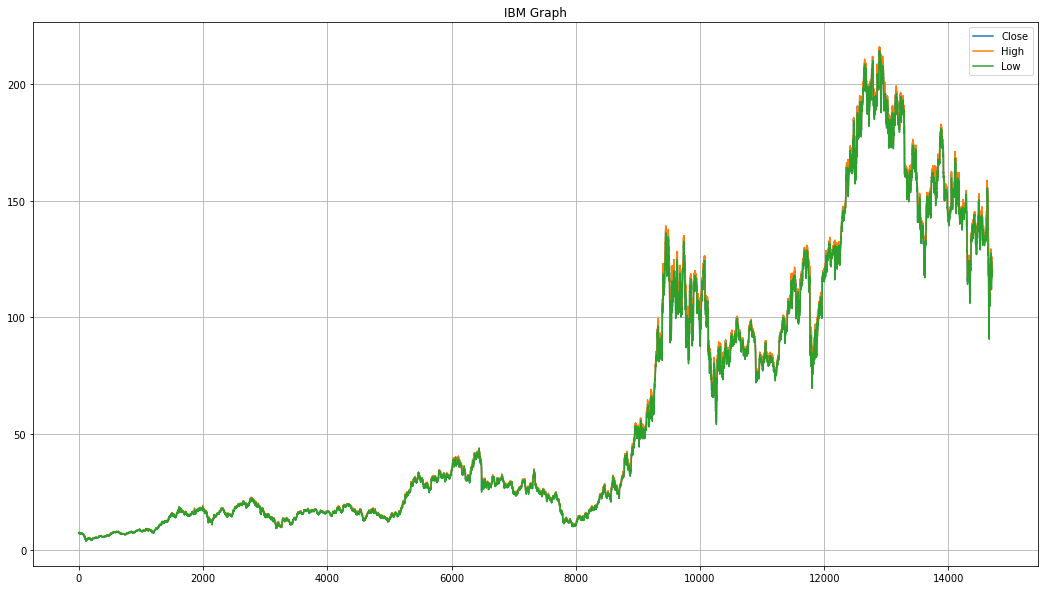

In [16]:
data.plot(title="IBM Graph", grid=True, y=['Close', 'High', 'Low'])

## Split Data (Training &  Testing)

In [25]:
training_data = data[data['Date'] < TRAIN_DATE_BOUNDARY]
training_data.drop(inplace=True, columns=['Date', 'Adj Close', 'Volume'], axis=1)
training_data.head()

,Open,High,Low,Close
0,7.713333,7.713333,7.626667,7.626667
1,7.626667,7.693333,7.626667,7.693333
2,7.693333,7.693333,7.613333,7.616667
3,7.606667,7.606667,7.453333,7.466667
4,7.460000,7.460000,7.266667,7.326667


In [28]:
test_data = data[data['Date'] >= TRAIN_DATE_BOUNDARY]
test_data.drop(inplace=True, columns=['Date', 'Adj Close', 'Volume'], axis=1)

Function for separating features and labels. Also converts data into timesteps

In [48]:
def data_timesteps(features, labels, steps = 1):
    x_data = []
    y_data = []
    for i in range(steps, features.shape[0]):
        x_data.append(features[(i - steps): i])
        y_data.append(labels[i, 0])
    return np.array(x_data), np.array(y_data)

In [49]:
training_features = training_data[['Open', 'High', 'Low']]
training_labels = training_data[['Close']]

In [50]:
labels_scaler = MinMaxScaler()
features_scaler = MinMaxScaler()

In [51]:
training_features = features_scaler.fit_transform(training_features)
training_labels = labels_scaler.fit_transform(training_labels)

In [53]:
training_features, training_labels = data_timesteps(training_features, training_labels, STEPS)
training_features

IndexError: too many indices for array